In [2]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset2.csv')
df.head()

,statuscode,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,cachecontrol,...,devicebrand,host,method,manifest,assetnumber,hit,@version,cachename,popname,uid
0,404,NaN,HTTP/1.1,0.000000,0.069129,0.069188,NaN,0.0,3815.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
1,404,NaN,HTTP/1.1,0.000000,0.077291,0.077333,NaN,0.0,3320.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
2,404,application/octet-stream,HTTP/1.1,0.206349,0.049394,0.049450,3600.0,0.0,4170.0,Cache-Control:max-age=3600,...,NaN,13.0,GET,False,NaN,miss,1,0,0,NaN
3,404,NaN,HTTP/1.1,0.000000,0.069060,0.069112,NaN,3.0,4518.0,Cache-Control:,...,1.0,0.0,GET,False,NaN,miss,1,0,0,NaN
4,404,NaN,HTTP/1.1,0.000000,0.104557,0.104600,NaN,0.0,4727.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN


In [3]:
df.shape

(88435, 30)

In [4]:
df.describe()

,statuscode,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,uamajor,uafamily,devicefamily,...,coordinates,livechannel,devicemodel,devicebrand,host,assetnumber,@version,cachename,popname,uid
count,88435.000000,88435.000000,88381.000000,88435.000000,1.281800e+04,76713.000000,7.957800e+04,33826.000000,76713.000000,76713.000000,...,88290.000000,37459.000000,42160.000000,42160.000000,88143.000000,26.000000,88435.0,88435.000000,88435.0,18917.000000
mean,427.389111,5.276034,0.462742,0.467105,1.020985e+05,0.788263,5.489040e+05,10.107166,8.441542,9.610588,...,551.362793,49.766518,16.363805,1.559559,7.577925,1023.538462,1.0,1.029445,0.0,7683.962785
std,40.058801,8.793875,1.916252,1.932443,1.758800e+06,1.108278,3.763814e+05,14.145579,11.343114,39.188949,...,1521.924543,38.313771,49.536725,4.214804,12.023056,911.970229,0.0,0.816312,0.0,6094.885603
min,404.000000,0.000000,0.000015,0.000000,6.000000e+01,0.000000,1.800000e+01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,1.0,0.000000,0.0,0.000000
25%,404.000000,0.206349,0.013535,0.013579,3.600000e+03,0.000000,2.284880e+05,1.000000,1.000000,0.000000,...,1.000000,14.000000,0.000000,0.000000,1.000000,258.000000,1.0,0.000000,0.0,1616.000000
50%,405.000000,0.285714,0.034024,0.034078,3.600000e+03,1.000000,4.578860e+05,4.000000,2.000000,1.000000,...,1.000000,60.000000,0.000000,0.000000,2.000000,680.500000,1.0,1.000000,0.0,7315.000000
75%,412.000000,3.047619,0.046529,0.046600,3.600000e+03,1.000000,8.467730e+05,14.000000,12.000000,1.000000,...,88.000000,60.000000,0.000000,0.000000,7.000000,1814.000000,1.0,2.000000,0.0,11357.000000
max,503.000000,23.888889,60.072557,60.072603,3.153600e+07,9.000000,1.281547e+06,141.000000,81.000000,822.000000,...,19519.000000,319.000000,799.000000,24.000000,59.000000,2530.000000,1.0,2.000000,0.0,26804.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88435 entries, 0 to 88434
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   statuscode      88435 non-null  int64  
 1   contenttype     76851 non-null  object 
 2   protocol        88435 non-null  object 
 3   contentlength   88435 non-null  float64
 4   timefirstbyte   88381 non-null  float64
 5   timetoserv      88435 non-null  float64
 6   maxage          12818 non-null  float64
 7   osfamily        76713 non-null  float64
 8   sid             79578 non-null  float64
 9   cachecontrol    88435 non-null  object 
 10  uamajor         33826 non-null  float64
 11  uafamily        76713 non-null  float64
 12  devicefamily    76713 non-null  float64
 13  fragment        88435 non-null  bool   
 14  path            88435 non-null  int64  
 15  @timestamp      88435 non-null  object 
 16  contentpackage  26 non-null     float64
 17  coordinates     88290 non-null 

In [6]:
df.isnull().sum()

statuscode            0
contenttype       11584
protocol              0
contentlength         0
timefirstbyte        54
timetoserv            0
maxage            75617
osfamily          11722
sid                8857
cachecontrol          0
uamajor           54609
uafamily          11722
devicefamily      11722
fragment              0
path                  0
@timestamp            0
contentpackage    88409
coordinates         145
livechannel       50976
devicemodel       46275
devicebrand       46275
host                292
method                4
manifest              0
assetnumber       88409
hit                  54
@version              0
cachename             0
popname               0
uid               69518
dtype: int64

<AxesSubplot:>

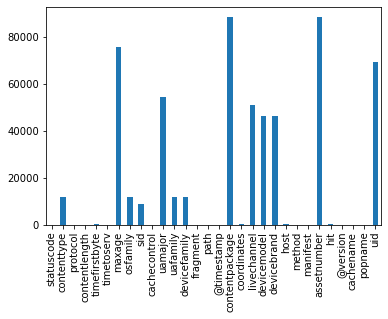

In [7]:
df.isnull().sum().plot.bar(x="Features", y="Missing Values")

In [8]:
df.nunique()

statuscode            8
contenttype           8
protocol              2
contentlength        22
timefirstbyte     38823
timetoserv        38422
maxage                5
osfamily             10
sid               43175
cachecontrol          6
uamajor              47
uafamily             27
devicefamily         68
fragment              1
path              13649
@timestamp        52092
contentpackage       11
coordinates        1586
livechannel         156
devicemodel          68
devicebrand          12
host                 37
method               20
manifest              1
assetnumber          11
hit                   1
@version              1
cachename             3
popname               1
uid                1276
dtype: int64

In [73]:
df.host.value_counts().sort_values()

55.0        1
59.0        1
42.0        1
15.0        1
37.0        2
52.0        2
48.0        2
43.0        2
40.0        3
4.0         3
21.0        3
17.0        6
45.0       10
10.0       11
57.0       18
30.0       18
50.0       18
9.0        19
12.0       23
31.0       27
26.0       27
32.0       27
20.0       31
5.0        38
11.0       60
3.0        66
0         292
16.0      379
46.0      382
54.0      386
14.0     2384
47.0     2384
53.0     2388
0.0      9600
13.0    12526
7.0     17189
2.0     19835
1.0     20270
Name: host, dtype: int64

,statuscode,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,uamajor,uafamily,devicefamily,...,livechannel,devicemodel,devicebrand,host,manifest,assetnumber,@version,cachename,popname,uid
statuscode,1.000000,-0.084426,0.415254,0.410350,NaN,0.406568,-0.461263,-0.276991,-0.301076,-0.073477,...,-0.277667,-0.192979,-0.189897,-0.292068,NaN,0.152052,NaN,-0.018470,NaN,0.018469
contentlength,-0.084426,1.000000,-0.070525,-0.070421,0.482555,-0.223720,0.259406,0.086618,0.090653,-0.112104,...,0.220316,-0.196629,-0.194027,0.018812,NaN,-0.614180,NaN,0.104215,NaN,0.037655
timefirstbyte,0.415254,-0.070525,1.000000,0.990762,-0.007056,0.155573,-0.179691,-0.110177,-0.129238,-0.036911,...,-0.134788,-0.087463,-0.094416,-0.127475,NaN,0.158040,NaN,-0.012130,NaN,-0.001714
timetoserv,0.410350,-0.070421,0.990762,1.000000,-0.007069,0.155574,-0.179692,-0.110172,-0.129236,-0.036910,...,-0.134788,-0.087462,-0.094414,-0.120349,NaN,0.158039,NaN,-0.012102,NaN,-0.001714
maxage,NaN,0.482555,-0.007056,-0.007069,1.000000,0.003056,-0.035858,-0.033622,-0.110049,-0.029087,...,NaN,NaN,NaN,-0.363886,NaN,NaN,NaN,-0.042687,NaN,NaN
osfamily,0.406568,-0.223720,0.155573,0.155574,0.003056,1.000000,-0.271833,0.289440,-0.328050,-0.097612,...,0.046520,-0.279420,-0.233491,-0.083691,NaN,0.289161,NaN,-0.032567,NaN,0.049659
sid,-0.461263,0.259406,-0.179691,-0.179692,-0.035858,-0.271833,1.000000,0.117349,0.091887,-0.046508,...,0.185415,0.012964,0.001160,0.235462,NaN,0.074741,NaN,0.640747,NaN,0.132351
uamajor,-0.276991,0.086618,-0.110177,-0.110172,-0.033622,0.289440,0.117349,1.000000,0.378777,0.173660,...,0.277909,0.404897,0.436387,0.677040,NaN,NaN,NaN,0.009412,NaN,0.020497
uafamily,-0.301076,0.090653,-0.129238,-0.129236,-0.110049,-0.328050,0.091887,0.378777,1.000000,0.618312,...,0.293597,0.896556,0.960850,0.481430,NaN,-0.289161,NaN,0.002086,NaN,0.102192
devicefamily,-0.073477,-0.112104,-0.036911,-0.036910,-0.029087,-0.097612,-0.046508,0.173660,0.618312,1.000000,...,-0.057384,0.967140,0.889439,0.171528,NaN,0.289161,NaN,-0.039930,NaN,0.015142


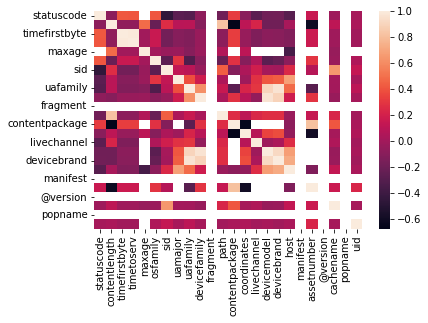

In [10]:
sns.heatmap(df.corr())
df.corr()

In [11]:
df["contenttype"].fillna("0", inplace = True)

In [12]:
df.head()

,statuscode,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,cachecontrol,...,devicebrand,host,method,manifest,assetnumber,hit,@version,cachename,popname,uid
0,404,0,HTTP/1.1,0.000000,0.069129,0.069188,NaN,0.0,3815.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
1,404,0,HTTP/1.1,0.000000,0.077291,0.077333,NaN,0.0,3320.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN
2,404,application/octet-stream,HTTP/1.1,0.206349,0.049394,0.049450,3600.0,0.0,4170.0,Cache-Control:max-age=3600,...,NaN,13.0,GET,False,NaN,miss,1,0,0,NaN
3,404,0,HTTP/1.1,0.000000,0.069060,0.069112,NaN,3.0,4518.0,Cache-Control:,...,1.0,0.0,GET,False,NaN,miss,1,0,0,NaN
4,404,0,HTTP/1.1,0.000000,0.104557,0.104600,NaN,0.0,4727.0,Cache-Control:,...,NaN,0.0,GET,False,NaN,miss,1,0,0,NaN


In [13]:
df.fillna("0", inplace = True)

In [14]:
df.head()

,statuscode,contenttype,protocol,contentlength,timefirstbyte,timetoserv,maxage,osfamily,sid,cachecontrol,...,devicebrand,host,method,manifest,assetnumber,hit,@version,cachename,popname,uid
0,404,0,HTTP/1.1,0.000000,0.069129,0.069188,0,0.0,3815.0,Cache-Control:,...,0,0.0,GET,False,0,miss,1,0,0,0
1,404,0,HTTP/1.1,0.000000,0.077291,0.077333,0,0.0,3320.0,Cache-Control:,...,0,0.0,GET,False,0,miss,1,0,0,0
2,404,application/octet-stream,HTTP/1.1,0.206349,0.049394,0.049450,3600.0,0.0,4170.0,Cache-Control:max-age=3600,...,0,13.0,GET,False,0,miss,1,0,0,0
3,404,0,HTTP/1.1,0.000000,0.06906,0.069112,0,3.0,4518.0,Cache-Control:,...,1.0,0.0,GET,False,0,miss,1,0,0,0
4,404,0,HTTP/1.1,0.000000,0.104557,0.104600,0,0.0,4727.0,Cache-Control:,...,0,0.0,GET,False,0,miss,1,0,0,0


In [15]:
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [62]:
X = categorical_columns
y = df['statuscode']

In [70]:
test = SelectKBest(score_func=chi2, k=10)
test.fit(X, y)
feature_score = pd.DataFrame({"Score":test.scores_,"P_Value":test.pvalues_},index=X.columns)
feature_score.nlargest(n=10,columns="Score")

,Score,P_Value
sid,1.093414e+10,0.0
maxage,1.325708e+09,0.0
uid,4.756541e+08,0.0
@timestamp,4.671225e+07,0.0
coordinates,1.203281e+07,0.0
contentpackage,2.910801e+06,0.0
livechannel,2.361450e+06,0.0
assetnumber,1.726917e+06,0.0
host,1.144222e+06,0.0
devicefamily,3.757301e+05,0.0


In [66]:
fit.shape

(88435, 10)

In [22]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88435 entries, 0 to 88434
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   statuscode      88435 non-null  int64  
 1   contenttype     88435 non-null  object 
 2   protocol        88435 non-null  object 
 3   contentlength   88435 non-null  float64
 4   timefirstbyte   88435 non-null  object 
 5   timetoserv      88435 non-null  float64
 6   maxage          88435 non-null  object 
 7   osfamily        88435 non-null  object 
 8   sid             88435 non-null  object 
 9   cachecontrol    88435 non-null  object 
 10  uamajor         88435 non-null  object 
 11  uafamily        88435 non-null  object 
 12  devicefamily    88435 non-null  object 
 13  fragment        88435 non-null  bool   
 14  path            88435 non-null  int64  
 15  @timestamp      88435 non-null  object 
 16  contentpackage  88435 non-null  object 
 17  coordinates     88435 non-null 

In [26]:
#Getting all the categorical columns except the target
categorical_columns = df.drop('statuscode', axis = 1)


In [48]:
categorical_columns = categorical_columns.select_dtypes(include = 'object')

In [56]:
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88435 entries, 0 to 88434
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   contenttype     88435 non-null  int32 
 1   protocol        88435 non-null  object
 2   timefirstbyte   88435 non-null  object
 3   maxage          88435 non-null  object
 4   osfamily        88435 non-null  object
 5   sid             88435 non-null  object
 6   cachecontrol    88435 non-null  object
 7   uamajor         88435 non-null  object
 8   uafamily        88435 non-null  object
 9   devicefamily    88435 non-null  object
 10  @timestamp      88435 non-null  object
 11  contentpackage  88435 non-null  object
 12  coordinates     88435 non-null  object
 13  livechannel     88435 non-null  object
 14  devicemodel     88435 non-null  object
 15  devicebrand     88435 non-null  object
 16  host            88435 non-null  object
 17  method          88435 non-null  object
 18  assetn

In [61]:
categorical_columns['@timestamp']= le.fit_transform(categorical_columns['@timestamp'])

C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_18748/4085800241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns['@timestamp']= le.fit_transform(categorical_columns['@timestamp'])


In [52]:
categorical_columns.head()

,contenttype,protocol,timefirstbyte,maxage,osfamily,sid,cachecontrol,uamajor,uafamily,devicefamily,...,contentpackage,coordinates,livechannel,devicemodel,devicebrand,host,method,assetnumber,hit,uid
0,0,HTTP/1.1,0.069129,0,0.0,3815.0,Cache-Control:,0.0,0.0,0.0,...,0,687.0,0,0,0,0.0,GET,0,miss,0
1,0,HTTP/1.1,0.077291,0,0.0,3320.0,Cache-Control:,0.0,0.0,0.0,...,0,92.0,0,0,0,0.0,GET,0,miss,0
2,application/octet-stream,HTTP/1.1,0.049394,3600.0,0.0,4170.0,Cache-Control:max-age=3600,14.0,21.0,0.0,...,0,1.0,0,0,0,13.0,GET,0,miss,0
3,0,HTTP/1.1,0.06906,0,3.0,4518.0,Cache-Control:,10.0,4.0,2.0,...,0,1.0,0,1.0,1.0,0.0,GET,0,miss,0
4,0,HTTP/1.1,0.104557,0,0.0,4727.0,Cache-Control:,0.0,0.0,0.0,...,0,1.0,0,0,0,0.0,GET,0,miss,0


In [57]:
categorical_columns['protocol']= le.fit_transform(categorical_columns['protocol'])
categorical_columns['cachecontrol']= le.fit_transform(categorical_columns['cachecontrol'])
categorical_columns['method']= le.fit_transform(categorical_columns['method'])
categorical_columns['hit']= le.fit_transform(categorical_columns['hit'])

C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_18748/48294113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns['protocol']= le.fit_transform(categorical_columns['protocol'])
C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_18748/48294113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_columns['cachecontrol']= le.fit_transform(categorical_columns['cachecontrol'])
C:\Users\Ajinkya Waghulikar\AppData\Local\Temp/ipykernel_18748/48294113.py:3: SettingWithC

In [58]:
categorical_columns.head()

,contenttype,protocol,timefirstbyte,maxage,osfamily,sid,cachecontrol,uamajor,uafamily,devicefamily,...,contentpackage,coordinates,livechannel,devicemodel,devicebrand,host,method,assetnumber,hit,uid
0,0,1,0.069129,0,0.0,3815.0,0,0.0,0.0,0.0,...,0,687.0,0,0,0,0.0,9,0,1,0
1,0,1,0.077291,0,0.0,3320.0,0,0.0,0.0,0.0,...,0,92.0,0,0,0,0.0,9,0,1,0
2,3,1,0.049394,3600.0,0.0,4170.0,3,14.0,21.0,0.0,...,0,1.0,0,0,0,13.0,9,0,1,0
3,0,1,0.06906,0,3.0,4518.0,0,10.0,4.0,2.0,...,0,1.0,0,1.0,1.0,0.0,9,0,1,0
4,0,1,0.104557,0,0.0,4727.0,0,0.0,0.0,0.0,...,0,1.0,0,0,0,0.0,9,0,1,0


In [67]:
# Import the function
from scipy.stats import chi2_contingency

chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(df['statuscode'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check]).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                                              Column  \
0         contenttype  protocol timefirstbyte  ma...   

                                          Hypothesis  
0  [Reject Null Hypothesis, Reject Null Hypothesi...  


C:\Users\Ajinkya Waghulikar\anaconda3\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [34]:
pd.crosstab(df['method'], df['statuscode'])

statuscode,404,405,412,416,417,500,502,503
method,,,,,,,,
-,0,0,0,0,50,0,0,0
0,0,0,0,0,4,0,0,0
ABCD,0,54,0,0,0,0,0,0
BADMETHOD,0,27,0,0,0,0,0,0
BADMTHD,0,27,0,0,0,0,0,0
BDMTHD,0,27,0,0,0,0,0,0
CFYZ,0,27,0,0,0,0,0,0
CONNECT,0,136,0,0,0,0,0,0
DEBUG,0,27,0,0,0,0,0,0


In [35]:
# Import the function
from scipy.stats import chi2_contingency
#Testing the relationship
chi_res = chi2_contingency(pd.crosstab(df['method'], df['statuscode']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 176870.00000000006, p-value: 0.0


In [40]:
method_dummies = pd.get_dummies(data = df[['method', 'statuscode']], columns = ['method'])

In [37]:
pd.get_dummies(data = df[['method', 'statuscode']], columns = ['method'])

,statuscode,method_-,method_0,method_ABCD,method_BADMETHOD,method_BADMTHD,method_BDMTHD,method_CFYZ,method_CONNECT,method_DEBUG,...,method_INDEX,method_OPTIONS,method_POST,method_PRONECT,method_PROPFIND,method_PUT,method_SEARCH,method_TRACE,method_TRACK,method_get
0,404,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,404,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,404,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,404,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,404,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88430,404,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88431,412,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88432,404,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88433,404,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
pd.crosstab(method_dummies['statuscode'], method_dummies['method_BADMTHD'])

method_BADMTHD,0,1
statuscode,,
404,43932,0
405,8776,27
412,15906,0
416,31,0
417,54,0
500,188,0
502,19336,0
503,185,0


In [39]:
chi_res = chi2_contingency(pd.crosstab(method_dummies['statuscode'], method_dummies['method_BADMTHD']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 244.31678227101378, p-value: 4.486652639979422e-49


<AxesSubplot:>

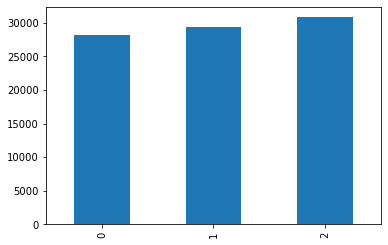

In [71]:
df.cachename.value_counts().sort_values().plot.bar()

<AxesSubplot:>

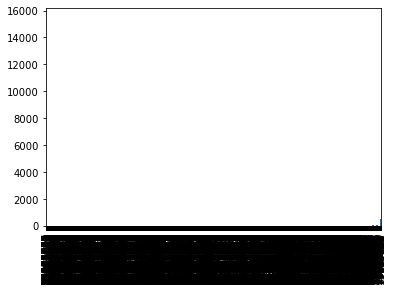

In [72]:
df.path.value_counts().sort_values().plot.bar()

In [4]:
df.livechannel.value_counts().sort_values()

19.0         1
99.0         1
227.0        1
44.0         1
144.0        1
         ...  
8.0        953
14.0      1102
13.0      1285
0.0       1633
60.0     15886
Name: livechannel, Length: 156, dtype: int64

In [5]:
df.uamajor.value_counts().sort_values()

46.0        1
44.0        2
24.0        2
59.0        2
11.0        3
61.0        3
104.0       3
66.0        3
141.0       4
13.0       11
12.0       13
39.0       16
21.0       21
22.0       21
41.0       22
63.0       27
70.0       27
74.0       27
87.0       29
64.0       32
56.0       32
40.0       35
18.0       40
6.0        42
112.0      52
81.0       54
58.0       54
5.0        54
80.0       54
75.0       54
27.0       63
38.0       70
7.0        76
9.0        92
77.0      108
20.0      109
8.0       148
2.0       253
72.0      297
62.0      392
3.0       560
10.0     1984
19.0     3541
4.0      3892
1.0      5267
0.0      7088
14.0     9146
Name: uamajor, dtype: int64